In [22]:
# store start time to get execution time of entire script
import time
start_time = time.time()

In [23]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

df = pd.read_csv('data/data_superset.csv')
df.dropna(subset=['murder_numg','hcd'], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,State,City,agyaddr,Illicit_Days5,Illicit_Cens5,adol,xobsyr_0,female_cd,nonwhite_cd,unemplmt_cd,prsatx_cd,gvsg_cd,CWSg_0_cd,srprobg_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,nonillicit_flag,primsev_cd_1,primsev_cd_2,primsev_cd_3,primsev_cd_4,primsev_cd_5,primsev_cd_6,Address,lat,lng,Geo_FIPS,murder_numg,hcd,%_U18g,%_female_householdg,%_unemployedg,%_public_assistanceg,%_povertyg
0,0,0,0,23223,FL,Miami,2140 South Dixie Hwy,365,0,0,2010,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,"2140 South Dixie Hwy, Miami, FL",25.743113,-80.228303,12086.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,2,2,2,929,OH,Cleveland,1276 West Third St. #400,354,0,1,2006,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,2,1,1,0,0,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,3,3,3,951,OH,Cleveland,1276 West Third St. #400,365,0,1,2006,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,1,0,0,1,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,4,4,4,1032,OH,Cleveland,1276 West Third St. #400,365,0,1,2006,0,0,0,0,2,0,1,1,1,1,1,0,2,1,0,2,1,0,0,1,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
19,19,19,19,1673,KY,Louisville,1220 Bardstown Rd,365,0,1,2006,0,0,0,0,0,0,0,0,1,1,0,0,2,2,0,0,1,0,0,1,0,0,0,"1220 Bardstown Rd, Louisville, KY",38.236398,-85.717815,21111.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [24]:
# drop unnecessary columns
cols_to_drop = ['Address','lat','lng','Geo_FIPS','xobsyr_0','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1',
                'ID','State','City','agyaddr','nonillicit_flag','adol']

df.drop(columns=cols_to_drop, inplace=True)
df = df.astype(int)
df.head()

,Illicit_Days5,Illicit_Cens5,female_cd,nonwhite_cd,unemplmt_cd,prsatx_cd,gvsg_cd,CWSg_0_cd,srprobg_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,primsev_cd_1,primsev_cd_2,primsev_cd_3,primsev_cd_4,primsev_cd_5,primsev_cd_6,murder_numg,hcd,%_U18g,%_female_householdg,%_unemployedg,%_public_assistanceg,%_povertyg
0,365,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0
2,354,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,2,1,0,0,0,0,0,0,1,1,1,1,0,0
3,365,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,1,1,1,1,0,0
4,365,0,0,0,0,0,2,0,1,1,1,1,1,0,2,1,0,2,0,0,1,0,0,0,0,1,1,1,1,0,0
19,365,0,0,0,0,0,0,0,0,0,1,1,0,0,2,2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0


In [25]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

predictor_var = 'Illicit_Days5'
censoring_var = 'Illicit_Cens5'

X = df.copy()
Y = X[[censoring_var, predictor_var]]
X.drop(columns=[censoring_var, predictor_var], inplace=True)

y = Surv.from_arrays(Y[censoring_var], Y[predictor_var]) # structured array to ensure censoring of 365 value
print(X.shape, y.shape)

(10034, 29) (10034,)


Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Optimal number of features : 17


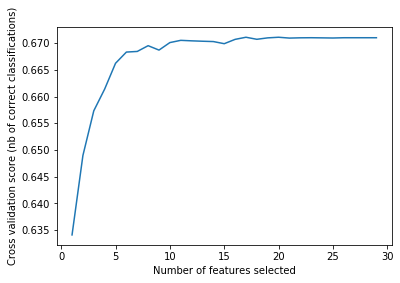

CPU times: user 35min 47s, sys: 46.7 s, total: 36min 33s
Wall time: 3h 26min 48s


In [26]:
%%time

import matplotlib.pyplot as plt
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.feature_selection import RFECV

# Create the Lasso regression object and compute a cross-validated score.
gbsa = GradientBoostingSurvivalAnalysis()

rfecv = RFECV(estimator=gbsa, cv=5, n_jobs=-1, verbose=2) # uses built-in scoring function (concordance index)
rfecv.fit(X, y) # uses feature_importances_ attribute to determine subset of features to keep after each iteration

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [27]:
selected_features = X.loc[:, rfecv.support_]
selected_features.head()

,nonwhite_cd,gvsg_cd,CWSg_0_cd,srprobg_cd,dssg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,primsev_cd_4,primsev_cd_5,primsev_cd_6,murder_numg,%_U18g,%_female_householdg
0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1
2,0,1,0,1,0,0,1,1,1,0,2,0,0,0,0,1,1
3,0,0,0,1,0,0,0,1,1,0,2,0,0,0,0,1,1
4,0,2,0,1,1,1,1,0,1,0,2,0,0,0,0,1,1
19,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,1,1


In [28]:
selected_features.columns

Index(['nonwhite_cd', 'gvsg_cd', 'CWSg_0_cd', 'srprobg_cd', 'dssg_0_cd',
       'adhdg_0_cd', 'cdsg_0_cd', 'cjsig_0_cd', 'srig_0_cd', 'SESg_0_cd',
       'r4ag_0_cd', 'primsev_cd_4', 'primsev_cd_5', 'primsev_cd_6',
       'murder_numg', '%_U18g', '%_female_householdg'],
      dtype='object')

In [29]:
# print out total notebook execution time
total_seconds = int(time.time() - start_time)
hours = total_seconds // 3600
minutes = (total_seconds - 3600 * hours) // 60
seconds = (total_seconds - 3600 * hours - 60 * minutes)
print("---", hours, "hours", minutes, "minutes", seconds, "seconds ---")

--- 3 hours 26 minutes 49 seconds ---
